# Assignment 1

First the packages relevant for solving the exercises are imported

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import pickle
import re
import matplotlib.pyplot as plt
import random
% matplotlib inline

# Part One: Network Models

## 1. Watts-Strogatz Networks

- Three graphs with $N=500$, $\langle k \rangle = 4$ and different rewiring probabilities $p = 0, 0.1 \textrm{ and } 0.2 $ are generated

In [5]:
ws0 = nx.watts_strogatz_graph(500,4,0)
ws01 = nx.watts_strogatz_graph(500,4,0.1)
ws1 = nx.watts_strogatz_graph(500,4,1)

 - For each of these graphs the average shortest path length is calculated using the $\texttt{networkx}$ command $\texttt{average_shortest_path_length}$

In [6]:
sp0 = nx.average_shortest_path_length(ws0)
print('For p=0 the average shortest path is %s: ') %sp0
sp01 = nx.average_shortest_path_length(ws01)
print('For p=0.1 the average shortest path is %s: ') %sp01
sp1 = nx.average_shortest_path_length(ws1)
print('For p=1 the average shortest path is %s: ') %sp1

For p=0 the average shortest path is 62.875751503: 
For p=0.1 the average shortest path is 7.44246092184: 
For p=1 the average shortest path is 4.77183166333: 


As the probability of rewiring increases the average shortest path length decreases, as the random links create shortcuts between otherwise far apart nodes in the network. At $p$=1 the average shortest path length approaches that of a random network.

 - To gain a better understand of how a WS-network behaves when p is increased 50 networks with $N=500$, $\langle k \rangle = 4 $ are generated for each rewiring probability in the set $p = \{0,0.01,0.03,0.05,0.1,0.2\}$

In [7]:
probs = [0,0.01,0.03,0.05,0.1,0.2]
stdev = []
avg_d = []
N_iter = 3
for p in probs:
    sp = np.zeros((N_iter,1))
    for i in range(N_iter):
        wsG = nx.watts_strogatz_graph(500,4,p)
        sp[i] = nx.average_shortest_path_length(wsG)
    stdev_curr = np.std(sp)
    avg_d_curr = np.mean(sp)
    stdev.append(stdev_curr)
    avg_d.append(avg_d_curr)  

 - Plot of average $\langle d \rangle$ as a function of rewiring probability $p$

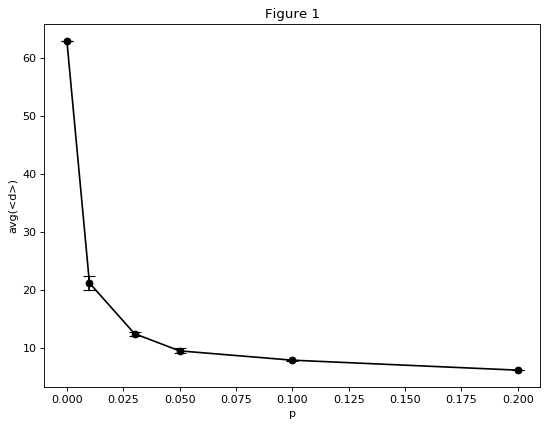

In [8]:
plt.figure(figsize=(8, 6), dpi= 80)
plt.errorbar(probs, avg_d, yerr = stdev, fmt = '-ko',capsize=5)
plt.xlabel('p')
plt.ylabel('avg(<d>)')
plt.title('Figure 1')
plt.show()

From **figure 1** it can be seen that the average shortest path length decreases drastically for even a minor change in rewiring probability.

## 2. The Barabasi-Albert Model

 - A BA-network of 100 nodes is created by first creating a single edge. A new node is then generated by picking a random node from the flattened version of the current edge list and this is repeated until the network contains a 100 nodes.

In [9]:
# BA network initialization
AB_G = nx.Graph()
AB_G.add_edge(1,2)
nnodes = 100
edge_list = np.array(list(AB_G.edges())).flatten()

# loop for adding new nodes to the network
for new_node in range(3,nnodes+1):
    pick_node = random.choice(edge_list)
    AB_G.add_edge(pick_node,new_node)
    edge_list = np.append(edge_list,[pick_node,new_node]) # append new edge to current edgelist

 - The created network is plotted below

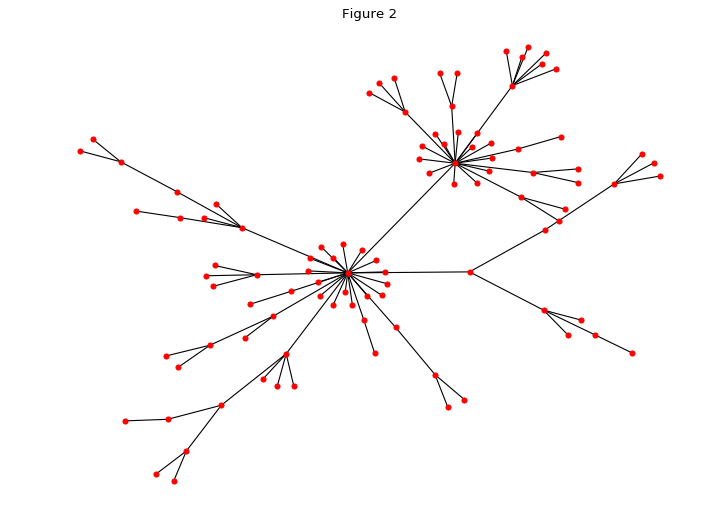

In [10]:
plt.figure(figsize=(8, 6), dpi= 80)
nx.draw(AB_G,node_size = 20, with_labels = False)
plt.title('Figure 2')
plt.show()

The graph in **figure 2** shows how the BA-model favours already connected nodes. Most of the nodes are only connected to one or two other nodes, while a few highly connected nodes have >10 connections.

 - The BA network generation process is now repeated for a 5000 node network

In [11]:
# BA network initialization
AB_G = nx.Graph()
AB_G.add_edge(1,2)
nnodes = 5000
edge_list = np.array(list(AB_G.edges())).flatten()

# loop for adding new nodes to the network
for new_node in range(3,nnodes+1):
    pick_node = random.choice(edge_list)
    AB_G.add_edge(pick_node,new_node)
    edge_list = np.append(edge_list,[pick_node,new_node]) # append new edge to current edgelist

To get the degree distribution the method $\texttt{Counter}$ from the $\texttt{collections}$ package is used

In [12]:
from collections import Counter
degree_sequence = sorted([deg for node, deg in AB_G.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence) # count each number of degree and store in dictionary
deg, cnt = zip(*degreeCount.items()) # unzip dictionary into two lists

The minimum and maximum degrees are:

In [13]:
print('Minimum degree in network: %s') %min(deg)
print('Maximum degree in network: %s') %max(deg)

Minimum degree in network: 1
Maximum degree in network: 154


From these two numbers it can be concluded that there is a huge difference in degree between the different nodes in the network. This is in contrast to a random network where the min and max degrees a normally quite close.

 - By plotting the degree distribution on both linear and log-log axes the following is found

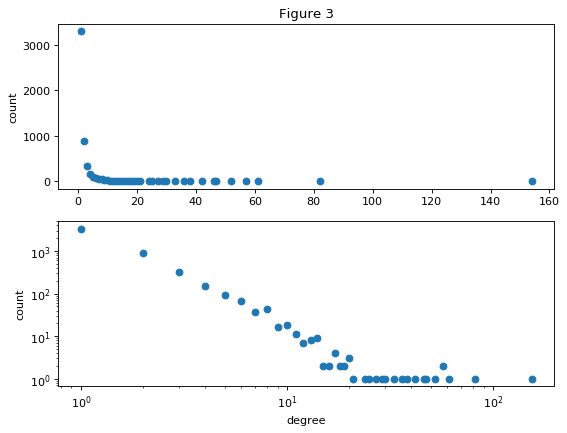

In [14]:
plt.figure(figsize=(8, 6), dpi= 80)
plt.subplot(211)
plt.title('Figure 3')
plt.plot(deg,cnt,'o')
plt.ylabel('count')
plt.subplot(212)
plt.loglog(deg,cnt,'o')
plt.xlabel('degree')
plt.ylabel('count')
plt.show()

**Figure 3** shows that the degree distribution in the AB network is indeed highly skewed towards the left and does not follow a normal distribution like a random network does.

## 3. Power-laws and the friendship paradox

 - First a check is made to see whether the friendship paradox holds for a single node. This is done by picking a node at random from the AB network and calculating the degree of itself and it's neighbours. If the average degree of the nodes neighbours is higher than the nodes own degree then the friendship paradox holds.

Calculate degree of single node

In [15]:
AB_nodeList = list(AB_G.nodes())
pick_node = random.choice(AB_nodeList)
node_degree = AB_G.degree(pick_node)
print('The degree of the picked node is: %s') %node_degree

The degree of the picked node is: 1


Calculate degree of the nodes neighbours

In [16]:
node_nbrs = nx.all_neighbors(AB_G,pick_node)
nbr_list = [node for node in node_nbrs]
nbr_avg_deg = np.mean([AB_G.degree(node) for node in nbr_list])
print('The average degree of the nodes neighbours is: %s') %nbr_avg_deg

The average degree of the nodes neighbours is: 4.0


Check whether the friendship paradox holds

In [17]:
if nbr_avg_deg > node_degree:
    friendship_paradox = 1
    print('The friendship paradox holds!')
else:
    friendship_paradox = 0
    print('The friendship paradox does not hold!')


The friendship paradox holds!


 - Checking whether the friendship paradox holds for only a single node is not really an exhaustive way of checking whether the friendship paradox holds. Therefore the above process is repeated a 1000 times

In [18]:
N_iter = 1000
friendship_bool = np.zeros((N_iter,1)) # boolean vector for storing the outcome of the friendship paradox hypothesis
for i in range(0,N_iter):
    # get degree of random node in the network
    pick_node = random.choice(AB_nodeList)
    node_degree = AB_G.degree(pick_node)
    # get avg degree of its neighbors
    node_nbrs = nx.all_neighbors(AB_G,pick_node)
    nbr_list = [node for node in node_nbrs]
    nbr_avg_deg = np.mean([AB_G.degree(node) for node in nbr_list])
    # check whether the friendship paradox holds
    if nbr_avg_deg > node_degree:
        friendship_paradox = 1
    else:
        friendship_paradox = 0
    # store result in boolean vector
    friendship_bool[i] = friendship_paradox

# calculate the percentage of times the friendship paradox holds
friendship_true = sum(friendship_bool>0)/np.double(N_iter)
print('The friendship paradox holds true %s percent of the time') %(friendship_true[0]*100)

The friendship paradox holds true 86.9 percent of the time


# Part Two: The network of American politics

## 4. Basics stats for pages over time

The data for the three house of representatives periods is loaded using the $\texttt{read_csv}$ function from $\texttt{pandas}$

In [19]:
df113 = pd.read_csv('H113.csv')
df114 = pd.read_csv('H114.csv')
df115 = pd.read_csv('H115.csv')

 - To check how the number of congressmen in each period has evolved the length of each dataset is found and plotted against each other

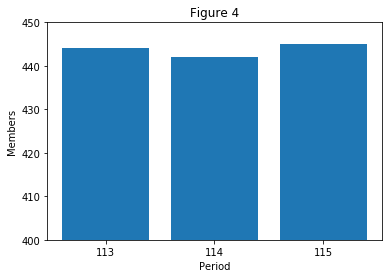

In [20]:
nrReps113 = len(df113.index)
nrReps114 = len(df114.index)
nrReps115 = len(df115.index)

plt.figure()
plt.title('Figure 4')
plt.bar(['113','114','115'], np.array([nrReps113,nrReps114,nrReps115]), width=0.8, align='center')
plt.xlabel('Period')
plt.ylabel('Members')
plt.ylim([400,450])
plt.show()

From figure 4 it can be seen that the number of congressmen slightly varies from period to period, although you would expect this to be a fixed number. The reason for these small deviations can be sickness, retirement or other personal reasons for withdrawing from the house of representatives.

 - To check the number of congressmen who have been in the house of representatives of multiple periods the threee datasets are first merged

In [21]:
df113['congressNumber'] = 113
df114['congressNumber'] = 114
df115['congressNumber'] = 115
all_members = pd.concat([df113,df114,df115]).reset_index(drop=True)

All candidates are then grouped by their "WikiPageName" which will appear multiple times in the dataset, if they have been sitting for multiple periods. The size of each group is then stored and sorted according to value.

In [22]:
candidates = all_members.groupby('WikiPageName')
times_in_congress = candidates.size().sort_values()

Finally the "times_in_congress" series is grouped by itself and the size is stored. This is similar to binning the series into three bins: 1,2 and 3.

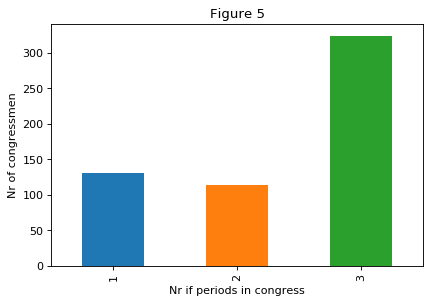

In [23]:
repetitions = times_in_congress.groupby(times_in_congress).size()

plt.figure(figsize=(6, 4), dpi= 80)
plt.title('Figure 5')
repetitions.plot('bar')
plt.xlabel('Nr if periods in congress')
plt.ylabel('Nr of congressmen')
plt.show()

From **figure 5** it can be seen that most congressmen have been in congress for multiple periods.

 - A similar analysis can be made to determine the amount of candidates from each state. First the merged dataset is grouped by state and the size of each group is then stored.

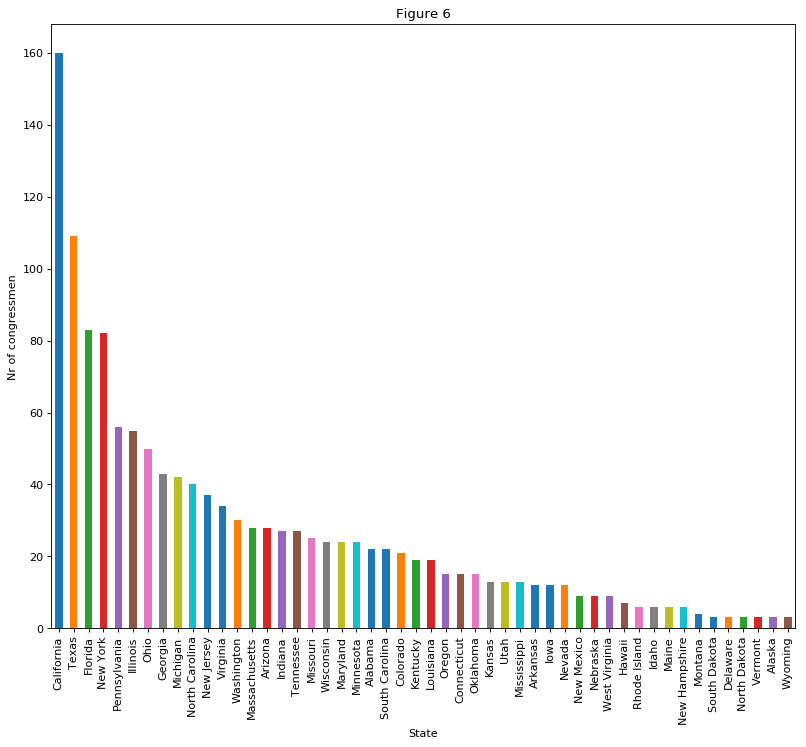

In [24]:
stateGroups = all_members.groupby('State')
stateSize = stateGroups.size().sort_values(ascending = False)
plt.figure(figsize=(12, 10), dpi= 80)
plt.title('Figure 6')
stateSize.plot('bar')
plt.ylabel('Nr of congressmen')
plt.show()

**Figure 6** shows that California is by far the most well represented state.

 - To analyze how the party composition has changed over time the merged dataset is first grouped by both "Party" and "congressNumber". In this way each group has a label/key consisting of the party and the congressNumber, i.e. ('Democratic,'113'). By taking the size of these groups and then grouping by "congressNumber" again the size of each party by period is gained.

In [25]:
parties_by_year = all_members.groupby(['Party','congressNumber'])
party_size_by_period = parties_by_year.size().groupby('congressNumber')

Looping over each group and plotting the corresponding pie chart yields the following result.

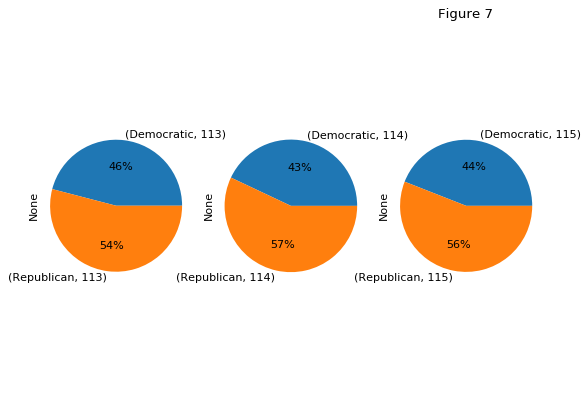

In [26]:
plot_index = [133,132,131]
plt.figure(figsize=(8, 6), dpi= 80)
for key, val in party_size_by_period:
    plt.subplot(plot_index.pop())
    val.plot('pie',autopct='%1.0f%%')
    plt.axis('equal')
plt.title('Figure 7')
plt.show()

**Figure 7** shows that even though the power has shift slightly from period to period the repulicans have always held majority.

## 5. Basic stats for the network

The wiki-pages for each of the representatives in the 113th period have been scraped and saved using $\texttt{pickle}$. These pages are now loaded, and their keys sorted and stored.

In [27]:
pages = pickle.load(open("House113.p","rb"))
pkeys = sorted(pages.keys())

Furthermore "WikiPageName" data for the 113th congress is sorted and stored in a separate variable.

In [28]:
df113 = df113.sort_values(by=['WikiPageName'])
pageNames = df113['WikiPageName']

A loop is then made over all the keys for the wiki pages and a regex is used to find the associated wiki links in each text. Each of these wiki links are tested against the names in the "WikiPageName" variable to see whether they match a candidate in the house of representatives.Before performing the comparision the wikiLinks are cleaned up so the format is the same as those in the pandas dataframe.

Finally the attributes for each candidate, i.e. state and party, are stored in dictionary for later use.

In [29]:
connectivity = dict() # dictionary for storing the page key and the associated wiki links
attrb = dict() # dictionary for storing the attributes of each candidate
cnt = 0
for p in pkeys: # loop over each key representing a wiki page
    connected_links = list() # initialize a list to store wikilinks
    pg_str = pages[p]['revisions'][0][u'*'].encode('utf-8') # get the newest revision of the wikipage and encode it to utf-8
    wikiLinks = re.findall(r'\[\[[\w|\s()-]+\]\]',pg_str) # use regex to find all wiki links in the text
    for link in wikiLinks: # clean up wiki links
        link = link.replace(' ','_')
        link = link.replace('[[','')
        link = link.replace(']]','')
        if link in list(pageNames): # check whether the link corresponds to a politician wiki page
            connected_links.append(link)       
    connected_links = set(connected_links)
    connectivity.update({p : connected_links})
    
    # set political party for each candidate
    attrb.update({p : {'Party': df113['Party'][cnt],'State': df113['State'][cnt]}}) 
    cnt += 1

Create the directed graph by looping through the "connectivity" dictionary and creating edges between each wiki page and its associated links. Finally assign attributes to each node.

In [30]:
G = nx.DiGraph()
for key,links in connectivity.items():
    links = list(links)
    for l in links:
        G.add_edge(key,l)
        
nx.set_node_attributes(G, attrb)

 - The number of nodes and edges in the network are:

In [31]:
print 'Number of nodes: %s' %len(list(G.nodes))
print 'Number of edges: %s' %len(list(G.edges))

Number of nodes: 440
Number of edges: 1388


 - The in and out degree distributions of the network nodes are plotted to get an overview of the graphs structure

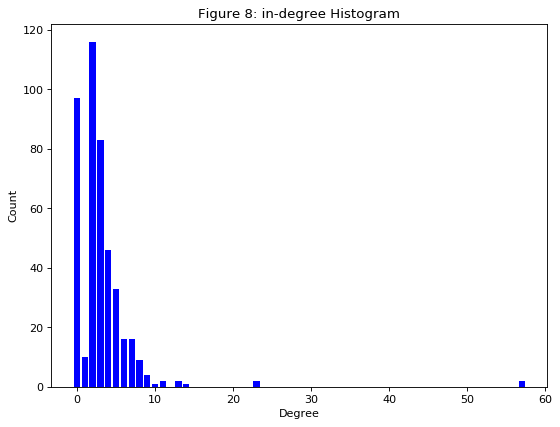

In [32]:
degree_sequence_in = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence_in)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(8, 6), dpi= 80)
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Figure 8: in-degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

The histrogram in **figure 8** shows that most candidates have around 3-10 references, however a big part of the members also have no references at all. Furthermore two outliers exist with >20 references.

 - The out-degree distribution is plotted below

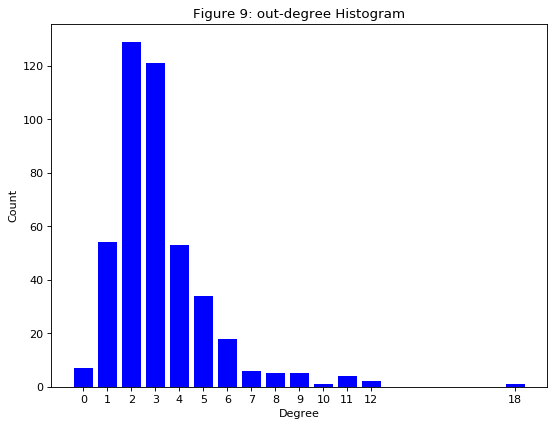

In [33]:
degree_sequence_out = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence_out)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(8, 6), dpi= 80)
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Figure 9: out-degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xticks(deg)
plt.show()

The out degree distibution looks slightly different with most member referencing around 2-3 other congress members. Again an outlier exists with >15 references to other congress members.

 - The average and maximum degree of the network is

In [34]:
degree_sum = 0
max_deg = 0
for node,deg in G.degree():
    if deg>max_deg:
        max_deg = deg
        max_node = node
    degree_sum += deg
avg_degree = float(degree_sum)/float(len(G.degree()))
print 'avg degree: %s' %avg_degree
print 'max degree: %s at node: %s' %(max_deg,max_node)

avg degree: 6.30909090909
max degree: 67 at node: John_Boehner


Thus, the most referenced member of the 113th House of Representatives is John Boehner. Since John Boehner was president for the House of Representatives in the period from 2011-2015 it makes sense that he will be the most referenced member in this period.